# 서로 다른 정수를 입력 받아 가능한 모든 순열을 리턴하라.

- 입력
```python
[1,2,3]
```

- 출력

```python
[
[1,2,3],
[1,3,2],
[2,1,3],
[2,3,1],
[3,1,2],
[3,2,1]
]
```

In [ ]:
# 풀이 1. DFS 를 활용한 순열 생성
# nPr = n!/(n-r)!, nCr = n!/(n-r)!r!
# 가능한 모든 순열 = 3 개의 원소 중에 3 개를 골라 순열 만들기 = 3!/0! = 3! = 6

# 순열 = 5개의 서로 다른 공 중에서 3개를 골라 나열하는 경우의 수
# 조합 = 4개의 공 중에서 무작위로 2개의 공을 고르는 경우의 수 = 순서를 신경 쓰지 않음

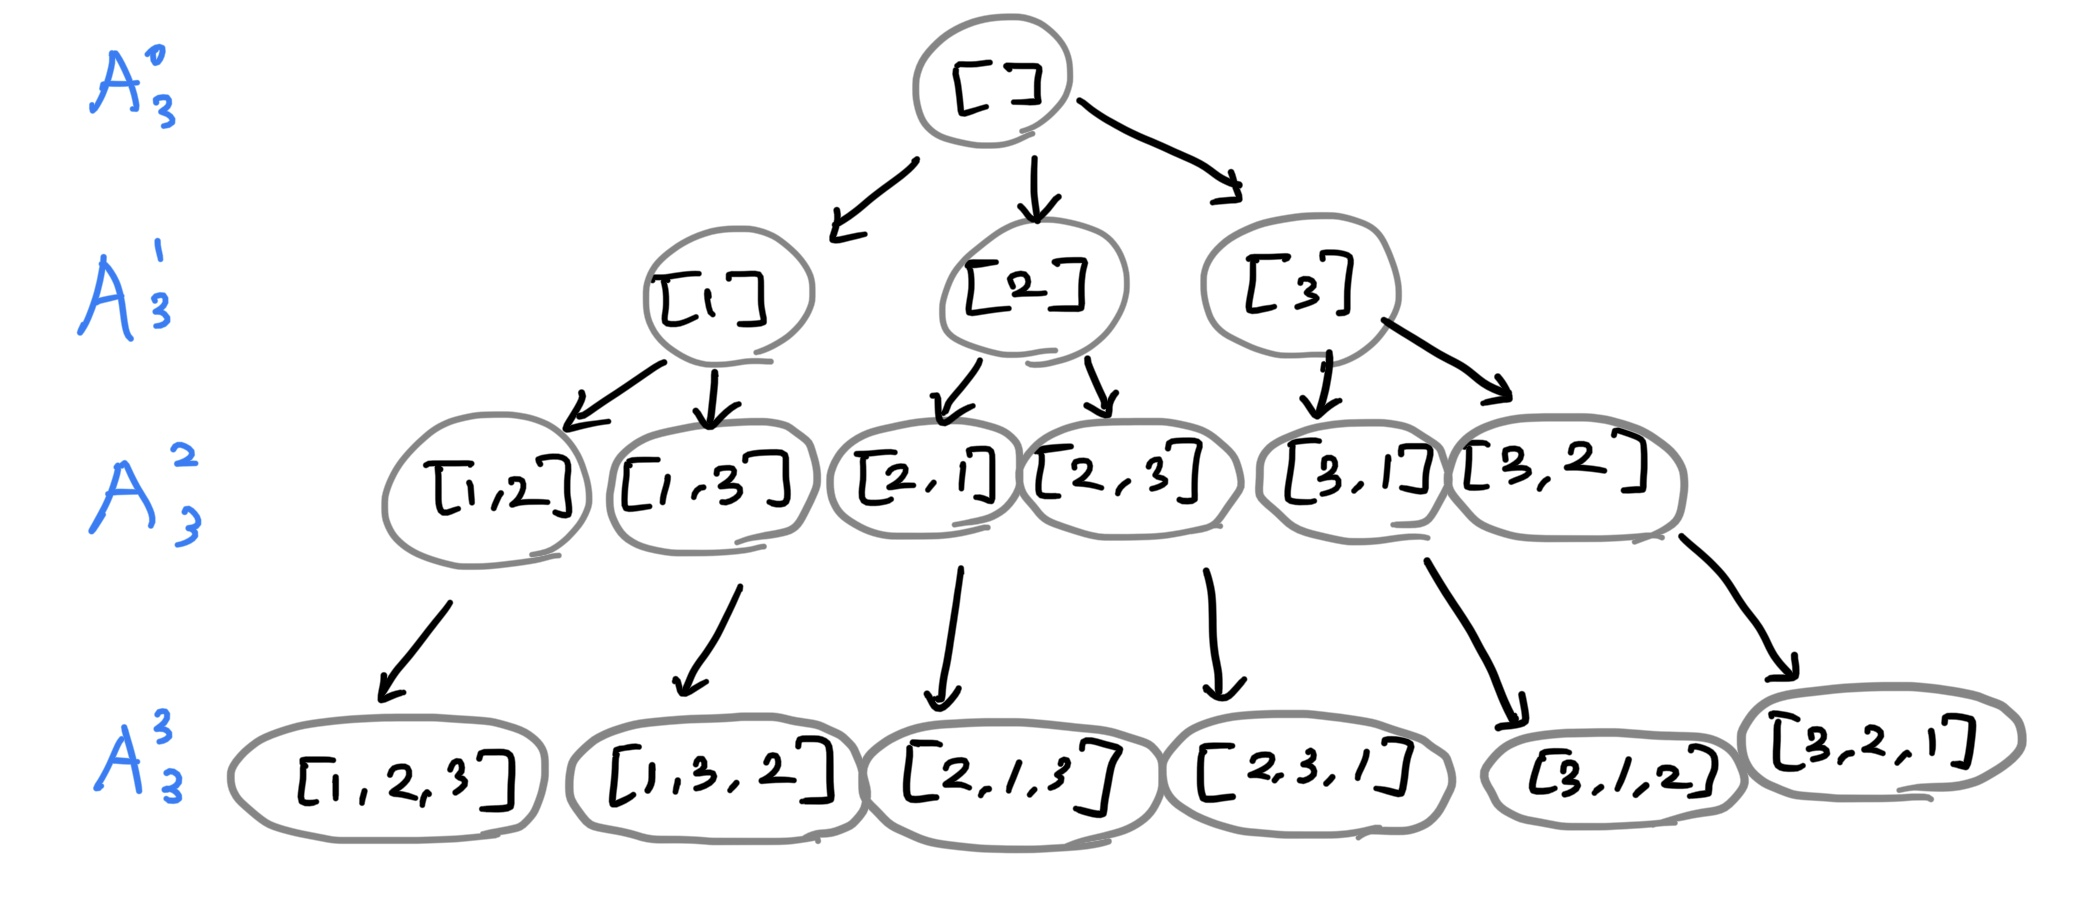

- 이 그림에서 리프노드, 즉 $$A^3_3$$ 의 모든 노드가 순열의 최종결과다.


- 가만히 살펴보면 레벨이 증가할수록 자식 노드의 개수는 점점 작아진다. 

- 처음에는 A0_3 의 자식노드는 3개 였다가 A1은 2개, A2 는 1개가 된다.

- 이는 순열의 수식이기도 한 3*2*1 의 형태이다. 만약 입력값이 5개라면 5*4*3*2*1 이 될 것이다.

In [ ]:
def dfs(elements):
    # 리프노드일 때 결과 추가
    if len(elements) == 0:
        results.append(prev_elements[:])
    # 순열 생성 재귀 호출
    for e in elements:
        next_elements = elements[:]
        next_elements.remove(e)

        prev_elements.append(e)
        dfs(next_elements)
        prev_elements.pop()

- 이전 값을 하나씩 덧붙여 계속 재귀호출을 진행하다 리프 노드에 도달한 경우, 즉 len(elements) ==0 일 때 결과를 하나씩 담는다.
- 이 때 중요한 부분은 결과를 추가할 때 prev_elements[:] 로 처리한다는 점이다. 
- 파이썬은 모든 객체를 참조하는 형태로 처리되므로 만약 results.append(prev_elements) 로 하게 된다면 결과 값이 추가되는 게 아니라 prev_elements 에 대한 참조가 추가되며, 이 경우 참조된 값이 변경될 경우 같이 바뀌게 된다.
- 따라서 반드시 값을 복사하는 형태로 처리 해야 참조관계를 갖지 않는다.
- [:]로 처리하는 방법 외에도 copy() 를 하거나 복잡한 리스트는 deepcopy() 로 처리하는 방법도 있다.

In [ ]:
# 전체 코드
from typing import List
def permute(nums:List[int])->List[List[int]]:
    results = []
    prev_elements = []
    
    
    def dfs(elements):
        # 리프노드일 때 결과 추가 == dfs 재귀 끝에 도달하면 next_elements 가 None 이 된다. 
        if len(elements) == 0: 
            results.append(prev_elements[:])
        # 순열 생성 재귀 호출
        for e in elements:
            next_elements = elements[:]
            next_elements.remove(e) # 자기 자신을 제외하고 모든 요소를 next_elements 로 처리

            prev_elements.append(e) # 순열은 prev_elements 에 앞의 모든 요소를 추가한다. [1,3,2] 와 [1,2,3] 은 다른 요소이기 때문이다.
            dfs(next_elements)
            prev_elements.pop() # 백트래킹이 한번 끝나면 차례로 pop 해 재귀호출된 수 만큼 prev_elements 를 비움 
    dfs(nums)
    return results


In [ ]:
# 풀이 2. itertools 사용
import itertools
def permute(nums):
    return list(itertools.permutations(nums))